In [4]:
import numpy as np
import pandas as pd
from scipy import stats
import statistics
import matplotlib.pyplot as plt
import seaborn as sns

# **Các thông số của tập dữ liệu**

In [5]:
df = pd.read_csv("/content/Inc_Exp_Data.csv")
df.head(10)

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,5000,8000,3,2000,64200,Under-Graduate,1
1,6000,7000,2,3000,79920,Illiterate,1
2,10000,4500,2,0,112800,Under-Graduate,1
3,10000,2000,1,0,97200,Illiterate,1
4,12500,12000,2,3000,147000,Graduate,1
5,14000,8000,2,0,196560,Graduate,1
6,15000,16000,3,35000,167400,Post-Graduate,1
7,18000,20000,5,8000,216000,Graduate,1
8,19000,9000,2,0,218880,Under-Graduate,1
9,20000,9000,4,0,220800,Under-Graduate,2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faec0603ad0>,
      dtype=object)

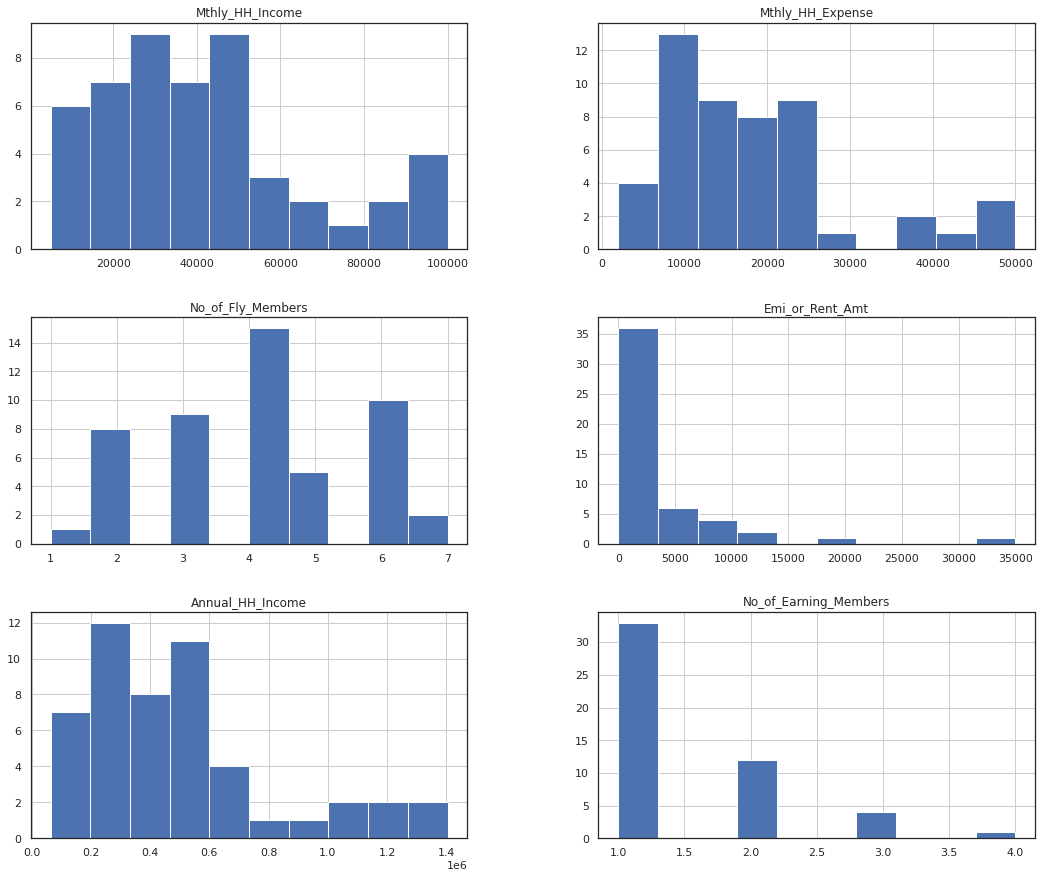

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
df.hist(figsize=(18,15))

In [13]:
# Xem thông tin dữ liệu trong df:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Mthly_HH_Income           50 non-null     int64 
 1   Mthly_HH_Expense          50 non-null     int64 
 2   No_of_Fly_Members         50 non-null     int64 
 3   Emi_or_Rent_Amt           50 non-null     int64 
 4   Annual_HH_Income          50 non-null     int64 
 5   Highest_Qualified_Member  50 non-null     object
 6   No_of_Earning_Members     50 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 2.9+ KB


In [14]:
# Xuất kích thước của tập dữ liệu
df.shape

(50, 7)

In [15]:
#Tiến hành xóa các dòng nếu có giá trị rỗng:
df = df.dropna()
df.shape

(50, 7)

**Nhận xét**


> Tập dữ liệu ban đầu không có giá trị rỗng (null/NA)



# **Tính toán các thông số thống kê của tập dữ liệu định lượng**

In [16]:
# Sử dụng hàm describe để xem tổng quát
df.describe()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members
count,50.000000,50.000000,50.000000,50.000000,5.000000e+01,50.000000
mean,41558.000000,18818.000000,4.060000,3060.000000,4.900190e+05,1.460000
std,26097.908979,12090.216824,1.517382,6241.434948,3.201358e+05,0.734291
min,5000.000000,2000.000000,1.000000,0.000000,6.420000e+04,1.000000
25%,23550.000000,10000.000000,3.000000,0.000000,2.587500e+05,1.000000
50%,35000.000000,15500.000000,4.000000,0.000000,4.474200e+05,1.000000
75%,50375.000000,25000.000000,5.000000,3500.000000,5.947200e+05,2.000000
max,100000.000000,50000.000000,7.000000,35000.000000,1.404000e+06,4.000000


In [20]:
# Tính trung bình các cột 
print("Giá trị trung bình của từng cột dữ liệu:")
pd.DataFrame(df.mean())

Giá trị trung bình của từng cột:


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


,0
Mthly_HH_Income,41558.00
Mthly_HH_Expense,18818.00
No_of_Fly_Members,4.06
Emi_or_Rent_Amt,3060.00
Annual_HH_Income,490019.04
No_of_Earning_Members,1.46


In [108]:
# Tính trung vị của các cột
print("Trung vị của từng cột dữ liệu:")
pd.DataFrame(df.median())

Trung vị của từng cột dữ liệu:


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


,0
Mthly_HH_Income,35000.0
Mthly_HH_Expense,15500.0
No_of_Fly_Members,4.0
Emi_or_Rent_Amt,0.0
Annual_HH_Income,447420.0
No_of_Earning_Members,1.0


In [30]:
# Tính giá trị min của từng cột dữ liệu
print("Giá trị min của từng cột dữ liệu")
pd.DataFrame(df.min(skipna= True, numeric_only= True))

Giá trị min của từng cột dữ liệu


,0
Mthly_HH_Income,5000
Mthly_HH_Expense,2000
No_of_Fly_Members,1
Emi_or_Rent_Amt,0
Annual_HH_Income,64200
No_of_Earning_Members,1


In [32]:
# Tính giá trị max của từng cột dữ liệu
print("Giá trị max của từng cột dữ liệu")
pd.DataFrame(df.max(skipna= True, numeric_only= True))

Giá trị max của từng cột dữ liệu


,0
Mthly_HH_Income,100000
Mthly_HH_Expense,50000
No_of_Fly_Members,7
Emi_or_Rent_Amt,35000
Annual_HH_Income,1404000
No_of_Earning_Members,4


#**Độ tương quan giữa các cột định lượng**

In [33]:
# Ma trận biểu diễn hệ số tương quan - coefficient of variation
correlation = df.corr(method="pearson")
correlation

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members
Mthly_HH_Income,1.000000,0.649215,0.448317,0.036976,0.970315,0.347883
Mthly_HH_Expense,0.649215,1.000000,0.639702,0.405280,0.591222,0.311915
No_of_Fly_Members,0.448317,0.639702,1.000000,0.085808,0.430868,0.597482
Emi_or_Rent_Amt,0.036976,0.405280,0.085808,1.000000,0.002716,-0.097431
Annual_HH_Income,0.970315,0.591222,0.430868,0.002716,1.000000,0.296679
No_of_Earning_Members,0.347883,0.311915,0.597482,-0.097431,0.296679,1.000000


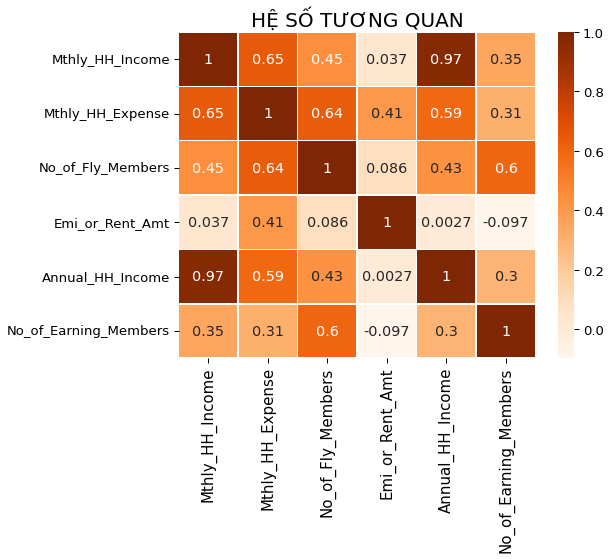

In [45]:
# Mô tả bằng HEAT MAP
plt.figure(figsize=(8,6))
sns.set_context("paper", font_scale=1.5)
plt.title("HỆ SỐ TƯƠNG QUAN", fontsize=20)
plt.xticks(fontsize=15)
sns.heatmap(correlation, annot=True, cmap="Oranges", linewidths=0.5, linecolor="white")

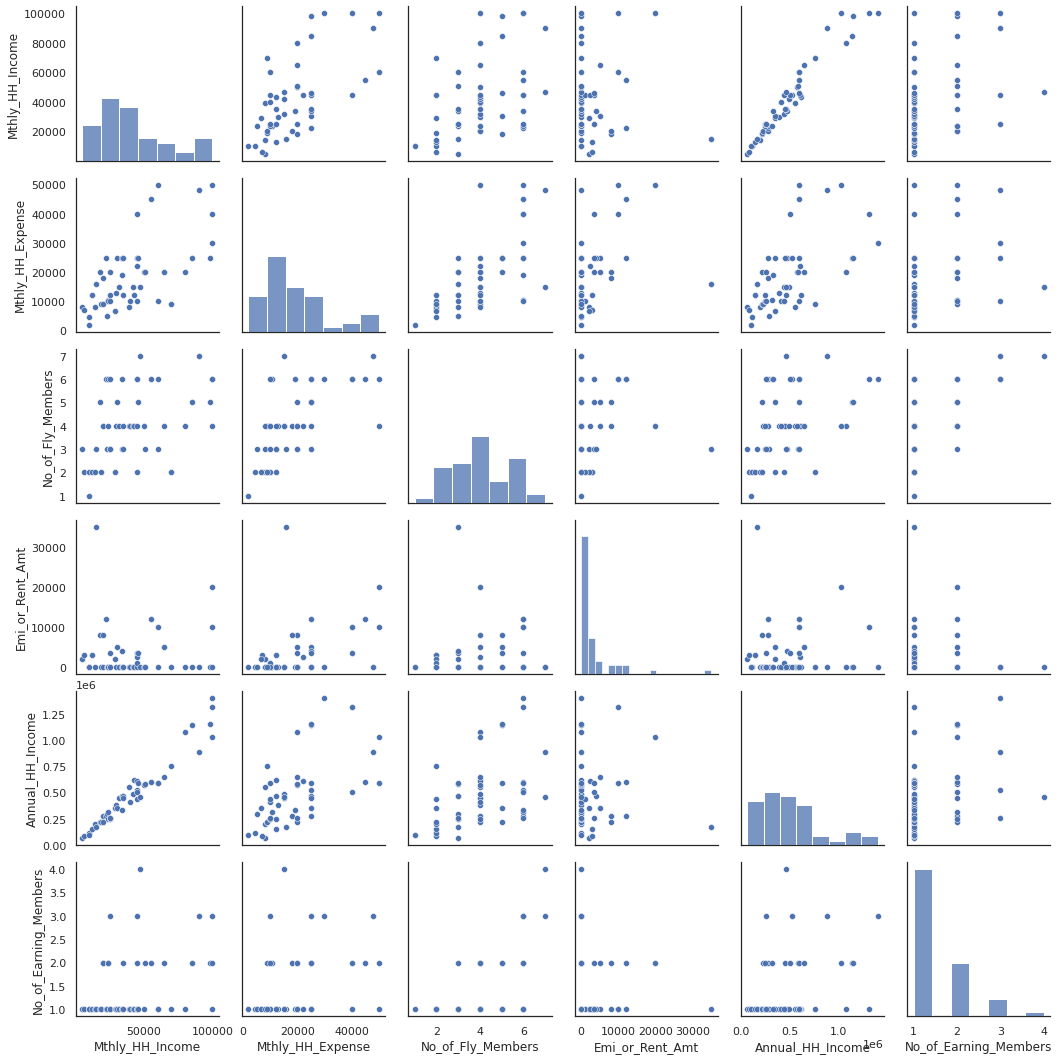

In [65]:
sns.pairplot(df)

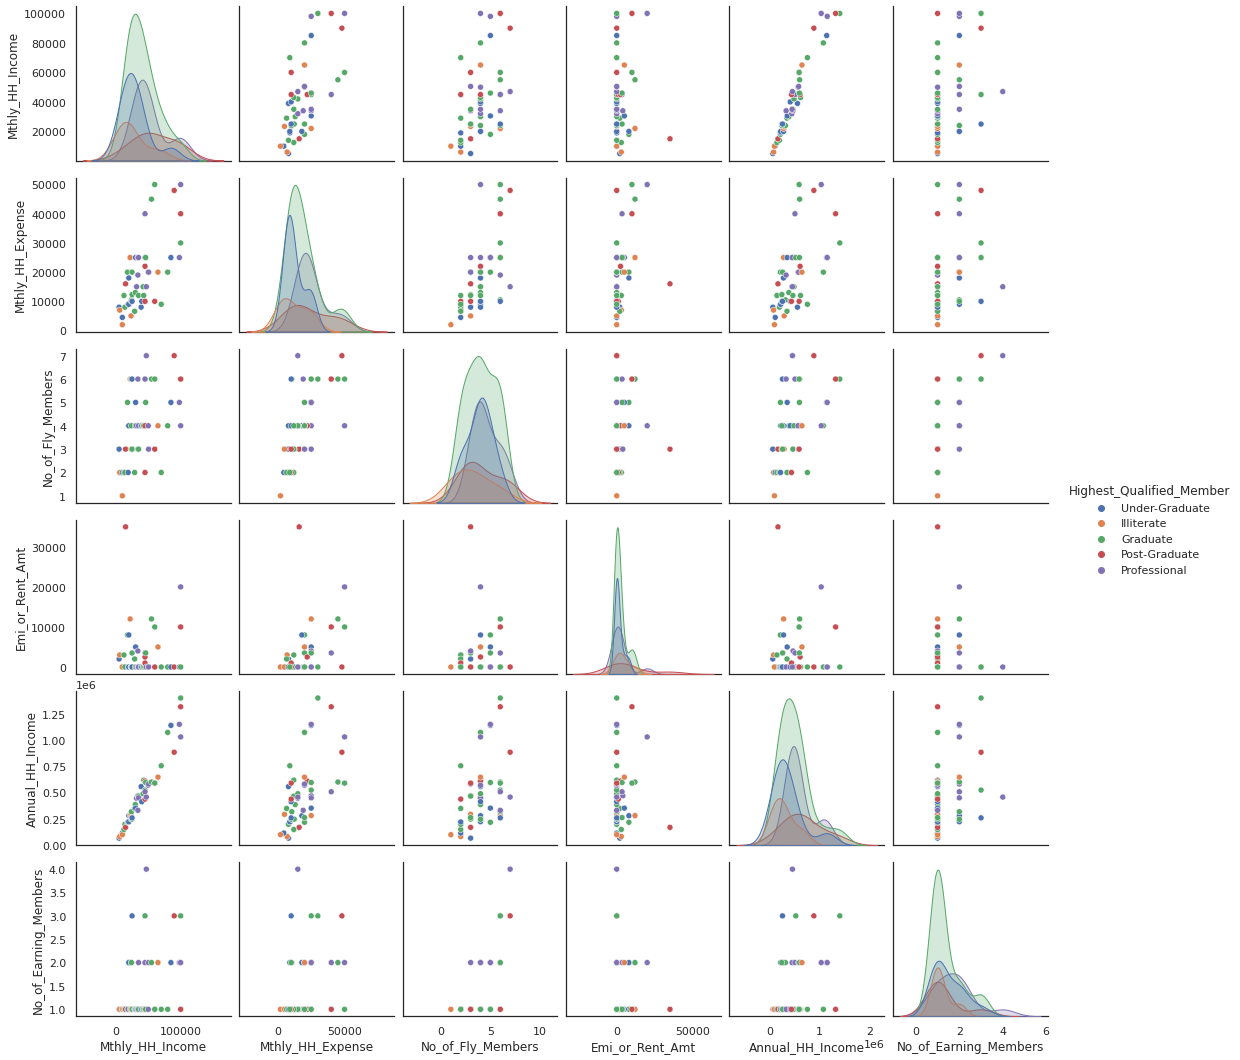

In [66]:
sns.set_theme(style="white")
sns.color_palette("hls", 8)
sns.pairplot(df, hue="Highest_Qualified_Member")

**Tương quan giữa thu nhập và chi tiêu hàng tháng**

Text(0, 0.5, 'Count')

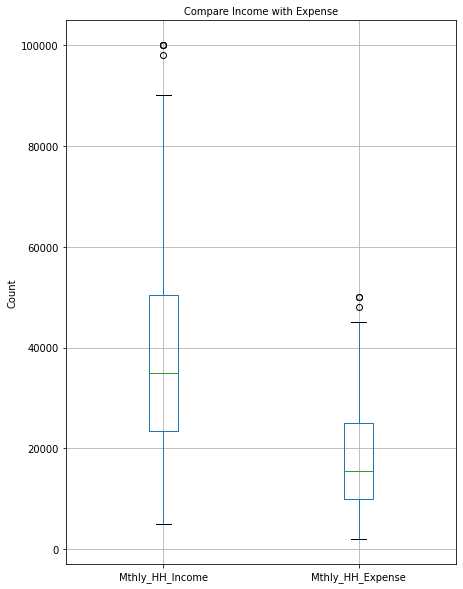

In [9]:
plt.figure(figsize=(7, 10))
plt.title("Compare Income with Expense", fontsize=10)
df[["Mthly_HH_Income", "Mthly_HH_Expense"]].boxplot()
plt.ylabel("Count")

Text(0, 0.5, 'Count')

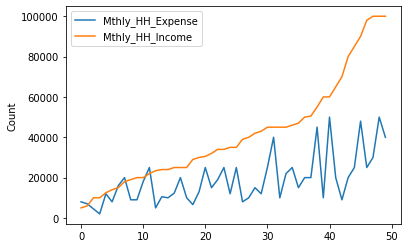

In [10]:
df[["Mthly_HH_Expense", "Mthly_HH_Income"]].plot()
plt.ylabel("Count")

# **Mthly_HH_Income Variable** - Thu nhập theo hộ gia đình hàng tháng

In [13]:
df.Mthly_HH_Income.describe()

count        50.000000
mean      41558.000000
std       26097.908979
min        5000.000000
25%       23550.000000
50%       35000.000000
75%       50375.000000
max      100000.000000
Name: Mthly_HH_Income, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


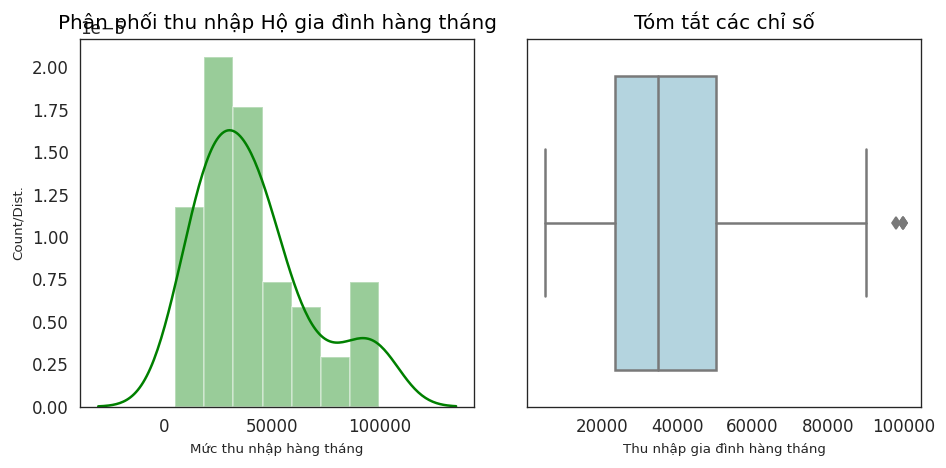

In [35]:
sns.set_style("white")
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))
# Vẽ biểu đồ Hist
plot0=sns.distplot(df[df["Mthly_HH_Income"]!=0]["Mthly_HH_Income"],ax=axes[0],color="green")
axes[0].set_title("Phân phối thu nhập Hộ gia đình hàng tháng",fontdict={"fontsize":12},color="Black")
axes[0].set_xlabel("Mức thu nhập hàng tháng",fontdict={"fontsize":8})
axes[0].set_ylabel("Count/Dist.",fontdict={"fontsize":8})
plt.tight_layout()
# Vẽ boxplot
plot1=sns.boxplot(df[df["Mthly_HH_Income"]!=0]["Mthly_HH_Income"],ax=axes[1],color="lightblue")
axes[1].set_title("Tóm tắt các chỉ số",fontdict={"fontsize":12},color="Black")
axes[1].set_xlabel("Thu nhập gia đình hàng tháng",fontdict={"fontsize":8})

plt.tight_layout()

Phân loại mức thu nhập hộ gia đình:
> Rất cao >= 80000$ 

> Cao >= 50000$ 

> Trung bình >= 20000$

> Thấp < 20000$

In [172]:
bins = [0, 20000, 50000, 80000, 100000]
type_df = df.copy()
type_df["Loại_thu_nhập"] = pd.cut(type_df["Mthly_HH_Income"], bins, labels = ["Thấp", "Trung bình", "Cao", "Rất cao"])
type_df.sample(10)

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members,Loại_thu_nhập
22,34000,19000,6,0,330480,Professional,1,Trung bình
24,35000,12000,3,0,466200,Graduate,1,Trung bình
2,10000,4500,2,0,112800,Under-Graduate,1,Thấp
33,45000,22000,4,2500,610200,Post-Graduate,1,Trung bình
44,85000,25000,5,0,1142400,Under-Graduate,2,Rất cao
30,45000,25000,6,0,523800,Graduate,3,Trung bình
28,42000,15000,4,0,488880,Graduate,1,Trung bình
43,80000,20000,4,0,1075200,Graduate,1,Cao
46,98000,25000,5,0,1152480,Professional,2,Rất cao
47,100000,30000,6,0,1404000,Graduate,3,Rất cao


Bảng thống kê mức thu nhập

In [162]:
type_inc = type_df.groupby("Loại_thu_nhập")["Loại_thu_nhập"].count()
type_inc = pd.DataFrame(type_inc)
type_inc.columns = ["Tần_số"]
type_inc["Phần_trăm"] = type_inc/sum(type_inc["Tần_số"])*100
type_inc

,Tần_số,Phần_trăm
Loại_thu_nhập,,
Thấp,11,22.0
Trung bình,26,52.0
Cao,7,14.0
Rất cao,6,12.0


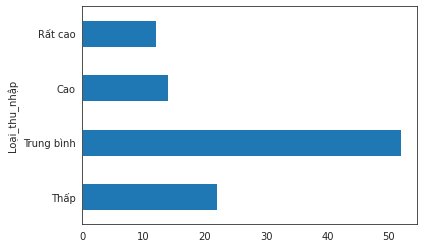

In [54]:
type_inc["Phần_trăm"].plot(x="Loại_thu_nhập",y="%",kind="barh")
plt.show()

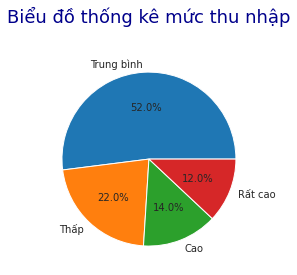

In [216]:
tn = type_df.Loại_thu_nhập.value_counts()
engines = tn.index
counts = tn.values
x = counts.cumsum()/counts.sum()*100
plt.xticks(rotation=100)
plt.pie(counts[:5], labels = engines[:5], autopct="%1.1f%%")
plt.title("Biểu đồ thống kê mức thu nhập", color = "darkblue", y = 1.1, fontsize = 18)
plt.show()

# **Mthly_HH_Expense Variable** - Chi tiêu hộ gia đình hàng tháng

In [157]:
df.Mthly_HH_Expense.describe()

count       50.000000
mean     18818.000000
std      12090.216824
min       2000.000000
25%      10000.000000
50%      15500.000000
75%      25000.000000
max      50000.000000
Name: Mthly_HH_Expense, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


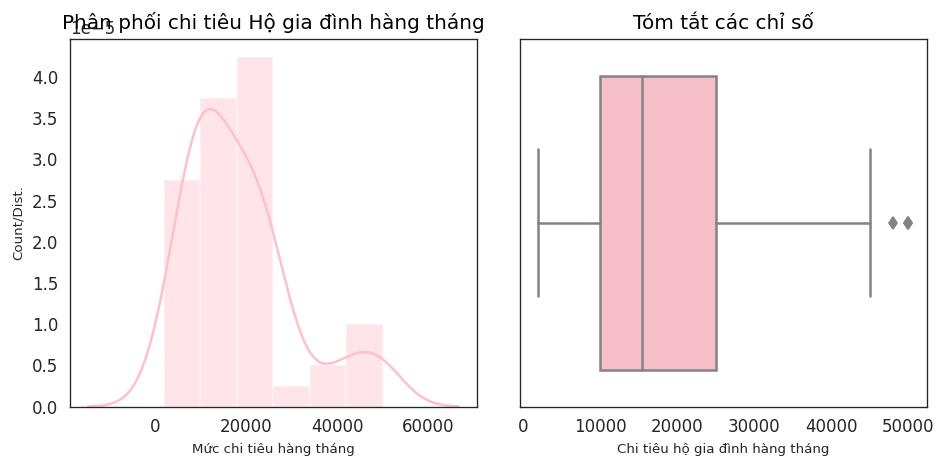

In [158]:
sns.set_style("white")
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))
# Vẽ biểu đồ Hist
plot0=sns.distplot(df[df["Mthly_HH_Expense"]!=0]["Mthly_HH_Expense"],ax=axes[0],color="pink")
axes[0].set_title("Phân phối chi tiêu Hộ gia đình hàng tháng",fontdict={"fontsize":12},color="Black")
axes[0].set_xlabel("Mức chi tiêu hàng tháng",fontdict={"fontsize":8})
axes[0].set_ylabel("Count/Dist.",fontdict={"fontsize":8})
plt.tight_layout()
# Vẽ boxplot
plot1=sns.boxplot(df[df["Mthly_HH_Expense"]!=0]["Mthly_HH_Expense"],ax=axes[1],color="lightpink")
axes[1].set_title("Tóm tắt các chỉ số",fontdict={"fontsize":12},color="Black")
axes[1].set_xlabel("Chi tiêu hộ gia đình hàng tháng",fontdict={"fontsize":8})

plt.tight_layout()

Phân loại mức chi tiêu hộ gia đình:
> Tiêu nhiều >= 40000$ 

> Tiêu vừa phải >= 20000$

> Tiết kiệm < 20000$

In [163]:
bins = [0, 20000, 40000, 60000]
type_ex = type_df.copy()
type_ex["Chi_tiêu"] = pd.cut(type_ex["Mthly_HH_Expense"], bins, labels = ["Tiết kiệm", "Tiêu vừa phải", "Tiêu nhiều"])
type_ex.sample(10)

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members,Loại_thu_nhập,Chi_tiêu
45,90000,48000,7,0,885600,Post-Graduate,3,Rất cao,Tiêu nhiều
46,98000,25000,5,0,1152480,Professional,2,Rất cao,Tiêu vừa phải
20,30500,25000,5,5000,351360,Under-Graduate,1,Trung bình,Tiêu vừa phải
8,19000,9000,2,0,218880,Under-Graduate,1,Thấp,Tiết kiệm
19,30000,13000,4,0,385200,Graduate,1,Trung bình,Tiết kiệm
18,29000,6600,2,2000,348000,Graduate,1,Trung bình,Tiết kiệm
31,45000,40000,6,3500,507600,Professional,2,Trung bình,Tiêu vừa phải
30,45000,25000,6,0,523800,Graduate,3,Trung bình,Tiêu vừa phải
47,100000,30000,6,0,1404000,Graduate,3,Rất cao,Tiêu vừa phải
1,6000,7000,2,3000,79920,Illiterate,1,Thấp,Tiết kiệm


Bảng thống kê mức chi tiêu

In [160]:
type_exx = type_ex.groupby("Chi_tiêu")["Chi_tiêu"].count()
type_exx = pd.DataFrame(type_exx)
type_exx.columns = ["Tần_số"]
type_exx["Phần_trăm"] = type_exx/sum(type_exx["Tần_số"])*100
type_exx

,Tần_số,Phần_trăm
Chi_tiêu,,
Tiết kiệm,34,68.0
Tiêu vừa phải,12,24.0
Tiêu nhiều,4,8.0


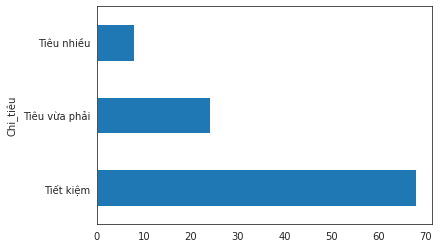

In [154]:
type_exx["Phần_trăm"].plot(x="Chi_tiêu",y="%",kind="barh")
plt.show()

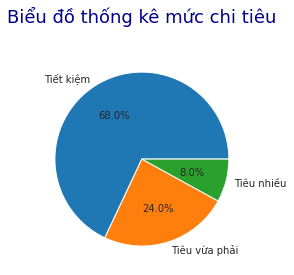

In [168]:
mct = type_ex.Chi_tiêu.value_counts()
engines = mct.index
counts = mct.values
n = counts.cumsum()/counts.sum()*100
plt.xticks(rotation=100)
plt.pie(counts[:5], labels = engines[:5], autopct="%1.1f%%")
plt.title("Biểu đồ thống kê mức chi tiêu", color = "darkblue", y = 1.1, fontsize = 18)
plt.show()


# **Annual_HH_Income Variable** - Thu nhập hộ gia đình hàng năm

In [95]:
df.Annual_HH_Income.describe()

count    5.000000e+01
mean     4.900190e+05
std      3.201358e+05
min      6.420000e+04
25%      2.587500e+05
50%      4.474200e+05
75%      5.947200e+05
max      1.404000e+06
Name: Annual_HH_Income, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


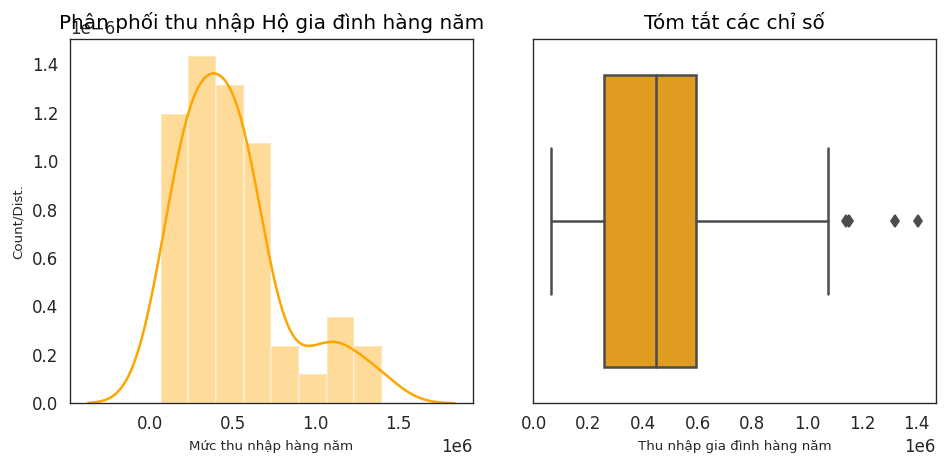

In [98]:
sns.set_style("white")
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))
# Vẽ biểu đồ Hist
plot0=sns.distplot(df[df["Annual_HH_Income"]!=0]["Annual_HH_Income"],ax=axes[0],color="orange")
axes[0].set_title("Phân phối thu nhập Hộ gia đình hàng năm",fontdict={"fontsize":12},color="Black")
axes[0].set_xlabel("Mức thu nhập hàng năm",fontdict={"fontsize":8})
axes[0].set_ylabel("Count/Dist.",fontdict={"fontsize":8})
plt.tight_layout()
# Vẽ boxplot
plot1=sns.boxplot(df[df["Annual_HH_Income"]!=0]["Annual_HH_Income"],ax=axes[1],color="Orange")
axes[1].set_title("Tóm tắt các chỉ số",fontdict={"fontsize":12},color="Black")
axes[1].set_xlabel("Thu nhập gia đình hàng năm",fontdict={"fontsize":8})

plt.tight_layout()

# **Highest_Qualified_Member Variable** - Trình độ học vấn cao nhất

In [107]:
# Chuyển giá trị về dạng số
type_hqm = type_ex.replace(to_replace =["Illiterate", "Under-Graduate", "Graduate", "Post-Graduate", "Professional"], value =[1,2,3,4,5])
type_hqm.sample(10)

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members,Loại_thu_nhập,Chi_tiêu
6,15000,16000,3,35000,167400,4,1,Thấp,Tiết kiệm
17,25000,10000,6,0,258000,2,3,Trung bình,Tiết kiệm
12,23400,5000,3,0,292032,1,1,Trung bình,Tiết kiệm
33,45000,22000,4,2500,610200,4,1,Trung bình,Tiêu vừa phải
8,19000,9000,2,0,218880,2,1,Thấp,Tiết kiệm
29,43000,12000,4,0,619200,3,1,Trung bình,Tiết kiệm
24,35000,12000,3,0,466200,3,1,Trung bình,Tiết kiệm
39,60000,10000,3,0,590400,4,1,Cao,Tiết kiệm
43,80000,20000,4,0,1075200,3,1,Cao,Tiết kiệm
22,34000,19000,6,0,330480,5,1,Trung bình,Tiết kiệm


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


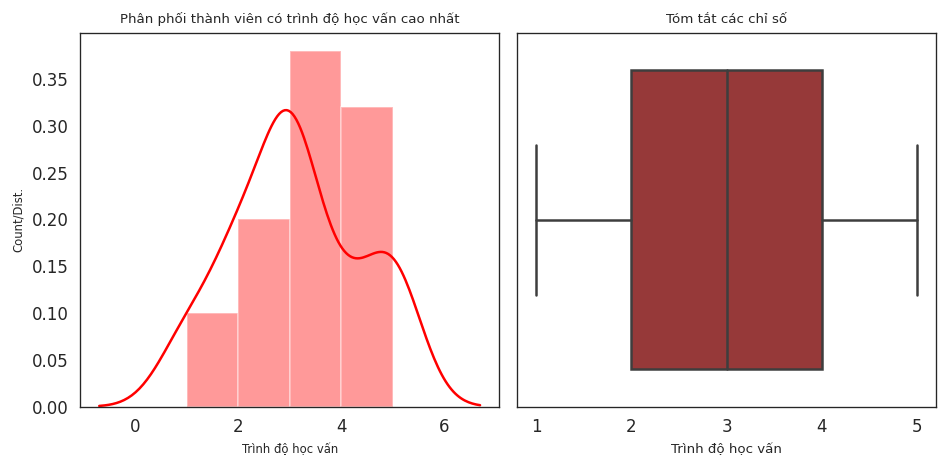

In [124]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))
plot0=sns.distplot(type_df[type_df["Highest_Qualified_Member"]!=0]["Highest_Qualified_Member"],ax=axes[0],color="red")
axes[0].set_title("Phân phối thành viên có trình độ học vấn cao nhất",fontdict={"fontsize":8})
axes[0].set_xlabel("Trình độ học vấn",fontdict={"fontsize":7})
axes[0].set_ylabel("Count/Dist.",fontdict={"fontsize":7})
plt.tight_layout()

plot1=sns.boxplot(type_df[type_df["Highest_Qualified_Member"]!=0]["Highest_Qualified_Member"],ax=axes[1],color="Brown")
axes[1].set_title("Tóm tắt các chỉ số",fontdict={"fontsize":8})
axes[1].set_xlabel("Trình độ học vấn",fontdict={"fontsize":8})
plt.tight_layout()

Highest_Qualified_Member - Bảng thống kê trình độ học vấn

In [128]:
hqm = df.groupby("Highest_Qualified_Member")["Highest_Qualified_Member"].count()
hqm = pd.DataFrame(hqm)
hqm.columns = ["Tần số"]
hqm["Phần trăm"] = hqm/sum(hqm["Tần số"])*100
hqm

,Tần số,Phần trăm
Highest_Qualified_Member,,
Graduate,19,38.0
Illiterate,5,10.0
Post-Graduate,6,12.0
Professional,10,20.0
Under-Graduate,10,20.0


Text(0, 0.5, 'Phần trăm')

<Figure size 576x576 with 0 Axes>

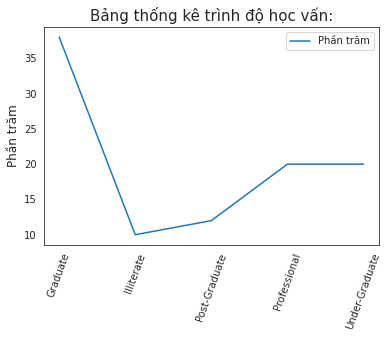

In [129]:
del hqm["Tần số"]
plt.figure(figsize=(8, 8))
hqm.plot()
plt.xticks(rotation =70, fontsize=10)
plt.xticks(fontsize=10)
plt.title("Bảng thống kê trình độ học vấn:", fontsize=15)
plt.xlabel("", fontsize=15)
plt.ylabel("Phần trăm", fontsize=12)

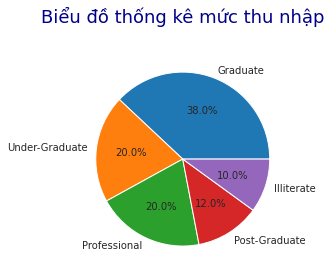

In [215]:
tn = df.Highest_Qualified_Member.value_counts()
engines = tn.index
counts = tn.values
x = counts.cumsum()/counts.sum()*100
plt.xticks(rotation=100)
plt.pie(counts[:5], labels = engines[:5], autopct="%1.1f%%")
plt.title("Biểu đồ thống kê mức thu nhập", color = "darkblue", y = 1.1, fontsize = 18)
plt.show()

# **Phân tích Mthly_HH_Income và Mthly_HH_Expense**

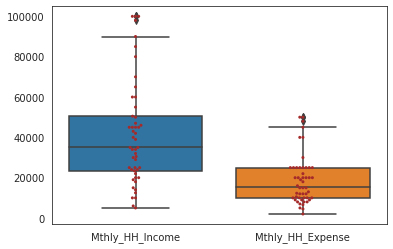

In [169]:
in_ex=df[["Mthly_HH_Income", "Mthly_HH_Expense"]]
sns.boxplot(data=in_ex)
sns.swarmplot(data=in_ex,size=3, color="brown")

**Tính số dư hàng tháng**


> Số dư = thu nhập hàng tháng - chi tiêu hàng tháng - thuế hàng tháng

> Số dư =  (Mthly_HH_Income) -  (Mthly_HH_Expense) - (Emi_or_Rent_Amt)



In [175]:
type_df["Số_dư_hàng_tháng"] = type_df["Mthly_HH_Income"] - type_df["Mthly_HH_Expense"] - type_df["Emi_or_Rent_Amt"]
type_df.head(10)

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members,Loại_thu_nhập,Số_dư_hàng_tháng
0,5000,8000,3,2000,64200,Under-Graduate,1,Thấp,-5000
1,6000,7000,2,3000,79920,Illiterate,1,Thấp,-4000
2,10000,4500,2,0,112800,Under-Graduate,1,Thấp,5500
3,10000,2000,1,0,97200,Illiterate,1,Thấp,8000
4,12500,12000,2,3000,147000,Graduate,1,Thấp,-2500
5,14000,8000,2,0,196560,Graduate,1,Thấp,6000
6,15000,16000,3,35000,167400,Post-Graduate,1,Thấp,-36000
7,18000,20000,5,8000,216000,Graduate,1,Thấp,-10000
8,19000,9000,2,0,218880,Under-Graduate,1,Thấp,10000
9,20000,9000,4,0,220800,Under-Graduate,2,Thấp,11000


In [176]:
type_df["Số_dư_hàng_tháng"].describe()

count       50.000000
mean     19680.000000
std      22486.794311
min     -36000.000000
25%       5125.000000
50%      17000.000000
75%      30875.000000
max      73000.000000
Name: Số_dư_hàng_tháng, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


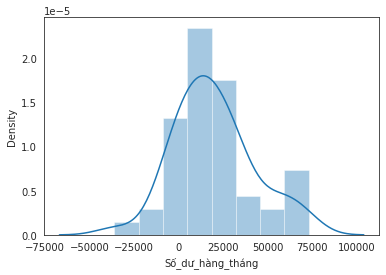

In [178]:
sns.distplot(type_df["Số_dư_hàng_tháng"])

In [180]:
chat_luong_cuoc_song = []
for x in type_df["Số_dư_hàng_tháng"]:
  if x < 0: chat_luong_cuoc_song.append("Nợ nần")
  elif 0 < x <= 5000: chat_luong_cuoc_song.append("Mức dư ít")
  elif 5000 < x <= 25000:chat_luong_cuoc_song.append("Khá giả")
  elif 25000 < x <= 60000: chat_luong_cuoc_song.append("Giàu")
  else : chat_luong_cuoc_song.append("Siêu giàu")
type_df.insert(9,"Mức sống",chat_luong_cuoc_song)
type_df.head(10)

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members,Loại_thu_nhập,Số_dư_hàng_tháng,Mức sống
0,5000,8000,3,2000,64200,Under-Graduate,1,Thấp,-5000,Nợ nần
1,6000,7000,2,3000,79920,Illiterate,1,Thấp,-4000,Nợ nần
2,10000,4500,2,0,112800,Under-Graduate,1,Thấp,5500,Khá giả
3,10000,2000,1,0,97200,Illiterate,1,Thấp,8000,Khá giả
4,12500,12000,2,3000,147000,Graduate,1,Thấp,-2500,Nợ nần
5,14000,8000,2,0,196560,Graduate,1,Thấp,6000,Khá giả
6,15000,16000,3,35000,167400,Post-Graduate,1,Thấp,-36000,Nợ nần
7,18000,20000,5,8000,216000,Graduate,1,Thấp,-10000,Nợ nần
8,19000,9000,2,0,218880,Under-Graduate,1,Thấp,10000,Khá giả
9,20000,9000,4,0,220800,Under-Graduate,2,Thấp,11000,Khá giả


In [192]:
oi_gioi_oi = type_df.groupby("Mức sống")["Mức sống"].count()
oi_gioi_oi = pd.DataFrame(oi_gioi_oi)
oi_gioi_oi.columns = ["Số lượng"]
oi_gioi_oi["Phần trăm"]= oi_gioi_oi/sum(oi_gioi_oi["Số lượng"])*100
oi_gioi_oi

,Số lượng,Phần trăm
Mức sống,,
Giàu,15,30.0
Khá giả,19,38.0
Mức dư ít,4,8.0
Nợ nần,8,16.0
Siêu giàu,4,8.0


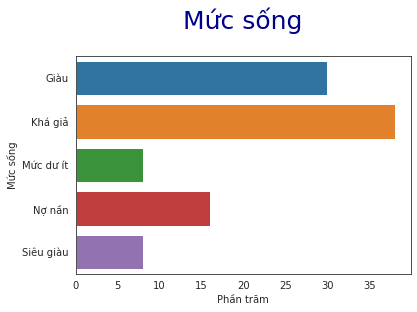

In [194]:
oi_gioi_oi.reset_index(inplace=True)
sns.barplot(y="Mức sống",x="Phần trăm",data = oi_gioi_oi)
plt.title("Mức sống", color = "darkblue", y = 1.1, fontsize = 25)
plt.show()

# **Phân tích ảnh hưởng của chi tiêu và thu nhập bởi trình độ học vấn**

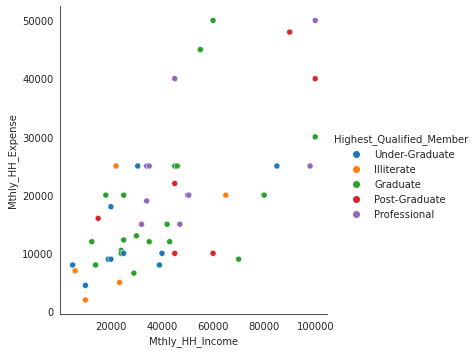

In [201]:
#Thống kê về chi tiêu hằng tháng so với trình độ học vấn
sns.relplot(data=df, x="Mthly_HH_Income", y="Mthly_HH_Expense", hue="Highest_Qualified_Member",kind="scatter")

In [217]:
mucsong=pd.crosstab(index=df["Highest_Qualified_Member"], columns=type_df["Mức sống"])
mucsong

Mức sống,Giàu,Khá giả,Mức dư ít,Nợ nần,Siêu giàu
Highest_Qualified_Member,,,,,
Graduate,3,9,1,3,3
Illiterate,1,2,0,2,0
Post-Graduate,4,1,0,1,0
Professional,4,3,2,0,1
Under-Graduate,3,4,1,2,0


<Figure size 1440x720 with 0 Axes>

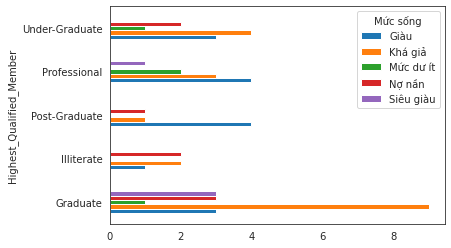

<Figure size 1440x720 with 0 Axes>

In [214]:
mucsong.plot.barh()